In [3]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from olist.seller import Seller
sellers = Seller().get_training_data()
sellers.head()

,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,months_on_olist,share_of_one_stars,share_of_five_stars,review_score,cost_of_reviews,n_orders,quantity,quantity_per_order,sales,revenues,profits
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP,0.000000,13.018588,2017-05-05 16:25:11,2017-08-30 12:50:19,4.0,0.333333,0.333333,3.00,140,3,3,1.000,218.70,421.870,281.870
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,0.000000,9.065716,2017-03-29 02:10:34,2018-06-06 20:15:21,14.0,0.050000,0.725000,4.55,240,40,41,1.025,11703.07,2370.307,2130.307
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ,0.000000,4.042292,2018-07-30 12:44:49,2018-07-30 12:44:49,0.0,0.000000,1.000000,5.00,0,1,1,1.000,158.00,95.800,95.800
3,c0f3eea2e14555b6faeea3dd58c1b1c3,sao paulo,SP,0.000000,5.667187,2018-08-03 00:44:08,2018-08-03 00:44:08,0.0,0.000000,1.000000,5.00,0,1,1,1.000,79.99,87.999,87.999
4,51a04a8a6bdcb23deccc82b0b80742cf,braganca paulista,SP,3.353727,35.314861,2017-11-14 12:15:25,2017-11-14 12:15:25,0.0,1.000000,0.000000,1.00,100,1,1,1.000,167.99,96.799,-3.201


In [5]:
seller = Seller()
training_set = seller.get_training_data()
sellers_data = training_set.copy()

# Análisis de Olist

## Presented by:

## Ricardo Rivas
## Mauricio González
## Mónica Venzor

In [6]:
alpha = 3157.27
beta = 978.23

sellers_data['cumulative_profits'] = sellers_data['profits'].cumsum()
sellers_data['cumulative_items'] = sellers_data['quantity'].cumsum()
n_sellers = np.arange(1, len(sellers_data) + 1)
sellers_data['cumulative_it_costs'] = alpha * np.sqrt(n_sellers) + beta * np.sqrt(sellers_data['cumulative_items'])
sellers_data['cumulative_net_profit'] = sellers_data['cumulative_profits'] - sellers_data['cumulative_it_costs']

## ❓ **Cómo podemos aumentar las ganancias de Olist** ❓

Exiten vendedores en nuestra plataforma que podrian generar pérdidas considerables.

Tenemos un total de 2967 vendedores que nos generan un impacto negativo conforme nuestras ganancias

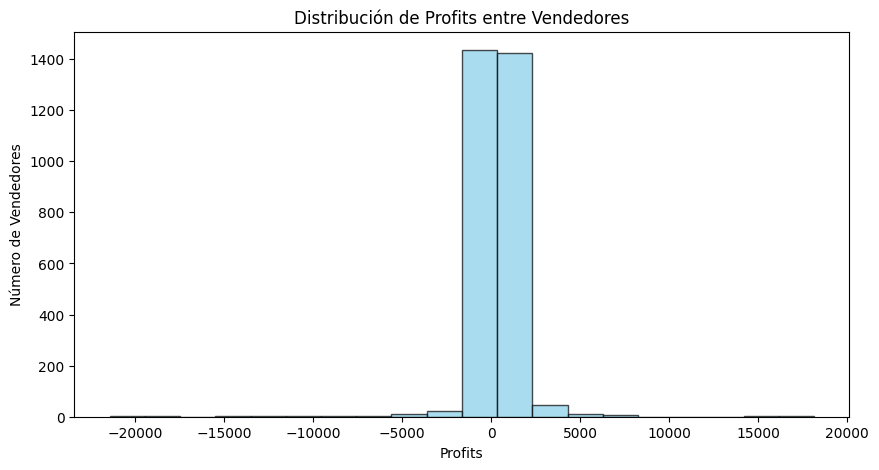

In [12]:
plt.figure(figsize=(10, 5))
plt.hist(sellers_data['profits'], bins=20, edgecolor='black', color='skyblue', alpha=0.7)
plt.xlabel('Profits')
plt.ylabel('Número de Vendedores')
plt.title('Distribución de Profits entre Vendedores');

# Determinacion de threshoold a los vendedores

### Utilizacion de quantiles (0.25) = vendedores de Bajo rendimiendo

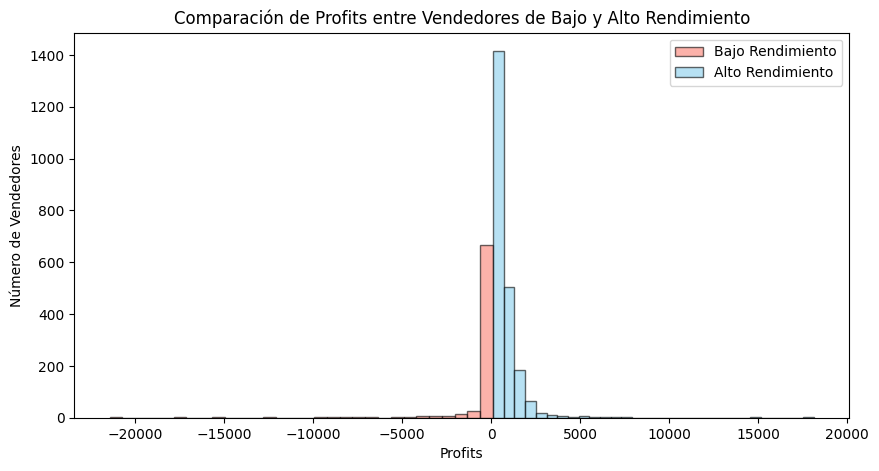

In [13]:
low_performance_threshold = sellers_data['profits'].quantile(0.25)
low_performance_threshold
low_performance_sellers = sellers_data[sellers_data['profits'] <= low_performance_threshold]
low_performance_sellers
profitable_sellers = sellers_data[sellers_data['profits'] > low_performance_threshold]

plt.figure(figsize=(10, 5))
plt.hist(low_performance_sellers['profits'], bins=30, edgecolor='black', color='salmon', alpha=0.6, label='Bajo Rendimiento')
plt.hist(profitable_sellers['profits'], bins=30, edgecolor='black', color='skyblue', alpha=0.6, label='Alto Rendimiento')
plt.xlabel('Profits')
plt.ylabel('Número de Vendedores')
plt.title('Comparación de Profits entre Vendedores de Bajo y Alto Rendimiento')
plt.legend()
plt.show()

742 vendedores son los vendedores que se categorizan como bajo rendimiento

2225 vendedores considerados como alto rendimiento

In [14]:
Perdidas generadas por vendedores de bajo rendimiento: -243773.202 (-17.35%)
Ganancias de vendedores de alto rendimiento: 1648741.646 (117.35%)

SyntaxError: invalid syntax (4066179493.py, line 1)

# Costos IT en relacion con vendedores Alto rendimiento

Disminuye el costo de IT, pero será considerable?

![Imagen desde la web](grafico.png)

# Conclusión

## En base a nuestro análisis podemos concluir que Olist aumentaria sus ganancias al reducir 742 vendedores de Bajo rendimiento, sin reflejar un impacto en las ganancias.

## 2225 vendedores 1648741.646 (117.35%)